Import all the needed Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


df = pd.read_csv('set11_it1.csv', sep=',')
df2 = pd.read_csv('set11_it2.csv', sep=',')


Pre-stepes


check the dataset


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2363 non-null   int64  
 1   TradeValue      2363 non-null   float64
 2   RealmType       2363 non-null   object 
 3   Enclave         2363 non-null   object 
 4   LivingQuarters  2245 non-null   float64
 5   ParcelSize      2363 non-null   float64
 6   ParcelSizeUnit  2363 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 129.4+ KB


check for enclave names

In [78]:
#check for enclave names
enclave_names = df['Enclave'].unique()
print("array:", enclave_names)

array: ['Brightforge' 'Petalbridge' 'Shadowmere' 'Dragonspire' 'Thornfield'
 'Wyverncliff' 'Ravenstone' 'Starfall' 'Riverbend' 'Emberfall' 'Sunspire'
 'Silverglen' 'Duskwood' 'Stormwatch' 'Mystvale' 'Cloudrest' 'Windwhisper'
 'Nighthaven' 'Glimmerwood' 'Crystalhollow' 'Wolfsbane' 'petalbridge'
 'Mossheart' 'Mosshearts' 'Stormhold' 'STORMWATCH' 'Dreamweaver'
 'Oakenshade' 'STORMHOLD' 'Moonglade' 'emberfall' 'RAVENSTONE'
 'DRAGONSPIRE' 'SUNSPIRE' 'THORNFIELD' 'Verdantia' 'MOSSHEART'
 'wyverncliff' 'silverglen' 'sunspire' 'Crystalhollows' 'SILVERGLEN'
 'Sunspires' 'crystalhollow' 'Dragonspires' 'starfall' 'Petalbridges'
 'duskwood' 'Windwhispers']


check for negative values 

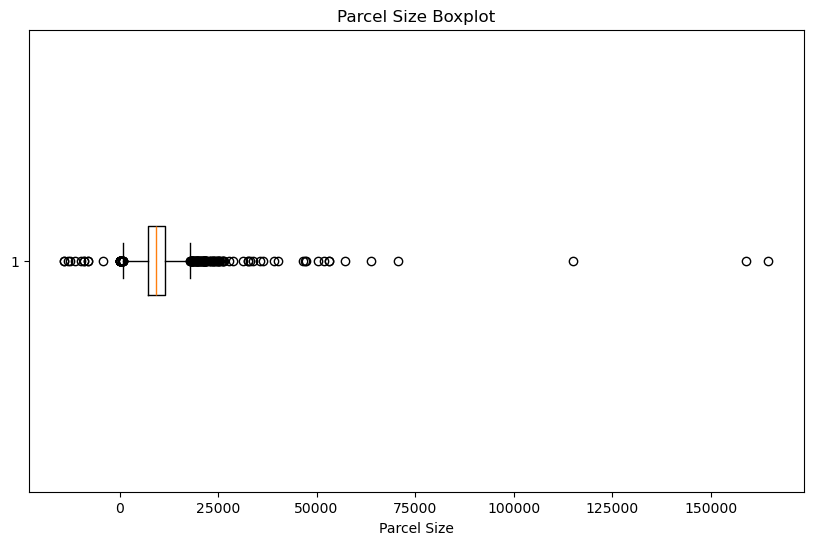

In [79]:
#boxplot for parcel size
plt.figure(figsize=(10, 6))
plt.boxplot(df['ParcelSize'], vert=False)
plt.title('Parcel Size Boxplot')
plt.xlabel('Parcel Size')
plt.show()

check for missing values 

In [80]:
#print the dataset only show rows with missing values
missing_values = df[df.isnull().any(axis=1)]
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
         DI  TradeValue       RealmType      Enclave  LivingQuarters  \
9        9    286000.0     Meadowlands    Riverbend             NaN   
31      31    500000.0     Meadowlands   Silverglen             NaN   
32      32    186500.0     Meadowlands     Duskwood             NaN   
45      45     76000.0  CitadelQuarter  Brightforge             NaN   
73      72    235128.0     Meadowlands  Wyverncliff             NaN   
...    ...         ...             ...          ...             ...   
2295  2274    144000.0  CitadelQuarter  Brightforge             NaN   
2324  2303    155000.0     Meadowlands    Verdantia             NaN   
2333  2312    107500.0     Meadowlands   Shadowmere             NaN   
2334  2313    212000.0     Meadowlands    Riverbend             NaN   
2342  2319    245000.0     Meadowlands  Wyverncliff             NaN   

      ParcelSize ParcelSizeUnit  
9         4923.0           sqft  
31       14300.0           sqft  
32       1026

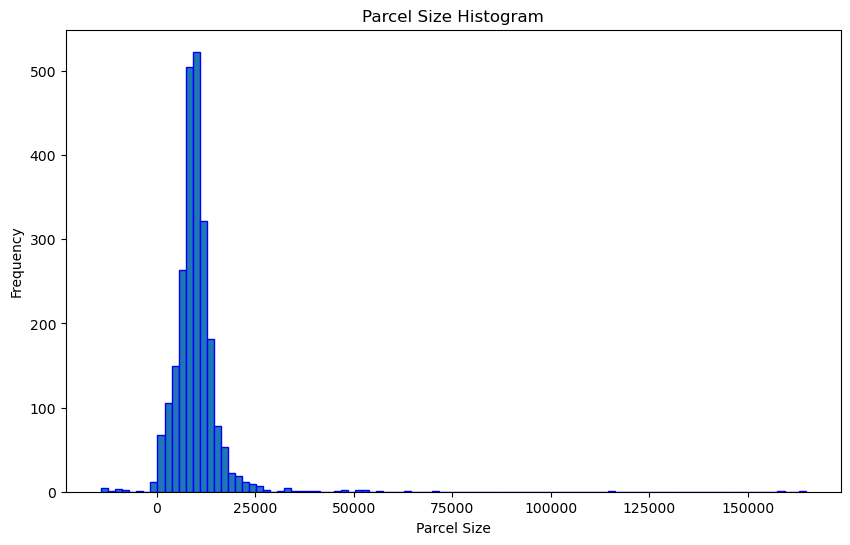

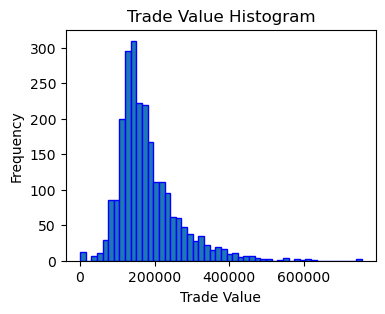

In [81]:
#histogram for parcel size
plt.figure(figsize=(10, 6))
plt.hist(df['ParcelSize'], bins=100, edgecolor='blue')
plt.title('Parcel Size Histogram')
plt.xlabel('Parcel Size')
plt.ylabel('Frequency')
plt.show()
#histogram for tradevalue
plt.figure(figsize=(4, 3))
plt.hist(df['TradeValue'], bins=50, edgecolor='blue')
plt.title('Trade Value Histogram')
plt.xlabel('Trade Value')
plt.ylabel('Frequency')
plt.show()

Step 1: Spelling error

['Brightforge' 'Petalbridge' 'Shadowmere' 'Dragonspire' 'Thornfield'
 'Wyverncliff' 'Ravenstone' 'Starfall' 'Riverbend' 'Emberfall' 'Sunspire'
 'Silverglen' 'Duskwood' 'Stormwatch' 'Mystvale' 'Cloudrest' 'Windwhisper'
 'Nighthaven' 'Glimmerwood' 'Crystalhollow' 'Wolfsbane' 'Mossheart'
 'Stormhold' 'Dreamweaver' 'Oakenshade' 'Moonglade' 'Verdantia']


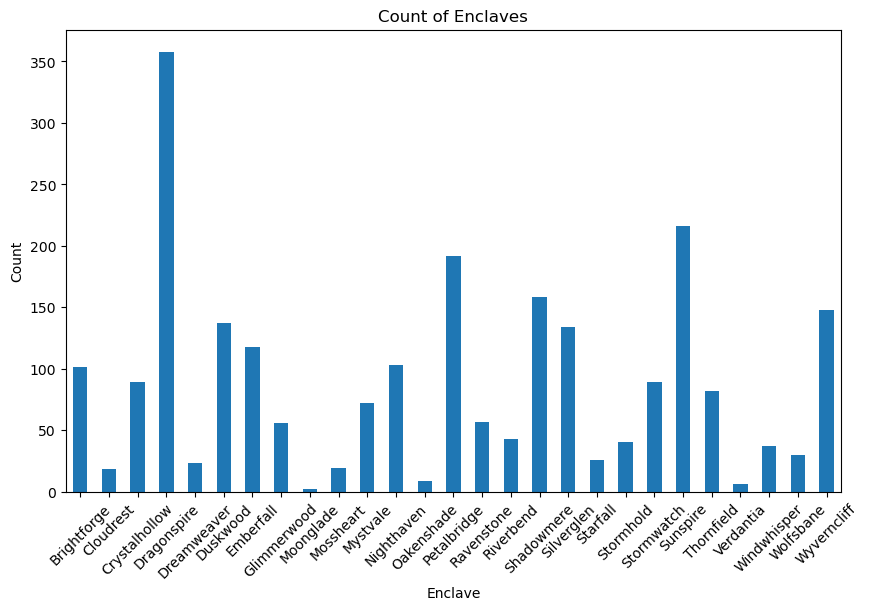

In [82]:
#first we check which enclave names are used in the df
df["Enclave"].unique()

#Now we can see what names are used for enclaves and what spelling errors are present
#then we can choose between 2 options:
#1. manually define the correct spelling of the enclave names and replace them in the df
#2. use a spell checker to correct the spelling errors in the df automatically
#we will use the first option for now since our df isn't growing too large and it is more error prone

# Define a manual mapping of incorrect names to correct ones
enclave_corrections = {
    'Dragonspire' : 'Dragonspire',
'Sunspire' : 'Sunspire',
'Petalbridge' : 'Petalbridge',
'Shadowmere' : 'Shadowmere',
'Wyverncliff' : 'Wyverncliff',
'Duskwood' : 'Duskwood',
'Silverglen' : 'Silverglen',
'Emberfall' : 'Emberfall',
'Nighthaven' : 'Nighthaven',
'Brightforge' : 'Brightforge',
'Stormwatch' : 'Stormwatch',
'Crystalhollow' : 'Crystalhollow',
'Thornfield' : 'Thornfield',
'Mystvale' : 'Mystvale',
'Ravenstone' : 'Ravenstone',
'Glimmerwood' : 'Glimmerwood',
'Riverbend' : 'Riverbend',
'Stormhold' : 'Stormhold',
'Windwhisper' : 'Windwhisper',
'Wolfsbane' : 'Wolfsbane',
'Starfall' : 'Starfall',
'Dreamweaver' : 'Dreamweaver',
'Cloudrest' : 'Cloudrest',
'Mossheart' : 'Mossheart',
'Oakenshade' : 'Oakenshade',
'Verdantia' : 'Verdantia',
'petalbridge' : 'Petalbridge',
'Moonglade' : 'Moonglade',
'Mosshearts' : 'Mossheart',
'STORMWATCH' : 'Stormwatch',
'STORMHOLD' : 'Stormhold',
'emberfall' : 'Emberfall',
'RAVENSTONE' : 'Ravenstone',
'DRAGONSPIRE' : 'Dragonspire',
'SUNSPIRE' : 'Sunspire',
'THORNFIELD' : 'Thornfield',
'MOSSHEART' : 'Mossheart',
'wyverncliff' : 'Wyverncliff',
'silverglen' : 'Silverglen',
'sunspire' : 'Sunspire',
'Crystalhollows' : 'Crystalhollow',
'SILVERGLEN' : 'Silverglen',
'Sunspires' : 'Sunspire',
'crystalhollow' : 'Crystalhollow',
'Dragonspires' : 'Dragonspire',
'starfall' : 'Starfall',
'Petalbridges' : 'Petalbridge',
'duskwood' : 'Duskwood',
'Windwhispers' : 'Windwhisper',
}

# Apply the corrections
df["Enclave"] = df["Enclave"].replace(enclave_corrections)
print(df["Enclave"].unique())

# Create a bar plot to see the count of the enclaves
enclave_counts = df["Enclave"].value_counts()

# Sort the counts alphabetically by index (enclave names)
enclave_counts = enclave_counts.sort_index()

enclave_counts.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Enclave')
plt.ylabel('Count')
plt.title('Count of Enclaves')
plt.xticks(rotation=45)
plt.show()




Step 2: Ensure One Realm Type per Enclave

check for multiple realmtypes per enclave

In [83]:
# Group by Enclave and count the number of unique RealmTypes per Enclave
enclave_realm_counts = df.groupby("Enclave")["RealmType"].nunique()

# Filter for enclaves that have more than one unique RealmType
multi_realm_enclaves = enclave_realm_counts[enclave_realm_counts > 1]

# Display the results
if not multi_realm_enclaves.empty:
    print("Enclaves with multiple RealmTypes detected:")
    print(multi_realm_enclaves)
else:
    print("No enclaves have multiple RealmTypes. Data is consistent.")


Enclaves with multiple RealmTypes detected:
Enclave
Brightforge      2
Crystalhollow    2
Dragonspire      2
Dreamweaver      2
Emberfall        2
Mystvale         2
Petalbridge      2
Shadowmere       3
Silverglen       2
Stormhold        3
Stormwatch       2
Sunspire         2
Thornfield       3
Wyverncliff      2
Name: RealmType, dtype: int64


Fix the Multiple realmtypes per enclave

In [84]:
# Find the most common RealmType per Enclave
realm_mapping = df.groupby("Enclave")["RealmType"].agg(lambda x: x.mode()[0])

# Apply the correction
df["RealmType"] = df["Enclave"].map(realm_mapping)

# Re-run the check to confirm the fix
multi_realm_enclaves = df.groupby("Enclave")["RealmType"].nunique()
if (multi_realm_enclaves > 1).any():
    print("Warning: Some enclaves still have multiple RealmTypes!")
else:
    print("RealmType inconsistencies fixed.")

#now show the current number of realtuperms per enclave
enclave_realm_counts = df.groupby("Enclave")["RealmType"].nunique()

# show all enclaves and the number of realm types they have
print("Enclave Realm Counts:\n", enclave_realm_counts)



RealmType inconsistencies fixed.
Enclave Realm Counts:
 Enclave
Brightforge      1
Cloudrest        1
Crystalhollow    1
Dragonspire      1
Dreamweaver      1
Duskwood         1
Emberfall        1
Glimmerwood      1
Moonglade        1
Mossheart        1
Mystvale         1
Nighthaven       1
Oakenshade       1
Petalbridge      1
Ravenstone       1
Riverbend        1
Shadowmere       1
Silverglen       1
Starfall         1
Stormhold        1
Stormwatch       1
Sunspire         1
Thornfield       1
Verdantia        1
Windwhisper      1
Wolfsbane        1
Wyverncliff      1
Name: RealmType, dtype: int64


Step 3: Fix Negative Parcel Sizes

We checked for negative values and there where 11. we decided between 3 options
option 1: If negatives seem like entry mistakes (e.g., -5000 should be 5000):
    Take the absolute value (df["ParcelSize"] = df["ParcelSize"].abs()).
option 2: If negatives are nonsense values (e.g., -0.5, -99999, -1):
    Convert them to NaN (missing values).
option 3: If we need to fill missing values:
    Replace them with the median ParcelSize.

we looked at the data and decided to choose option 1, since the data entries looked like an human error

✅ Negative ParcelSize values successfully fixed.
count      2363.000000
mean       9915.263193
std        7185.409896
min           0.058050
25%        7251.000000
50%        9345.000000
75%       11496.000000
max      164660.000000
Name: ParcelSize, dtype: float64


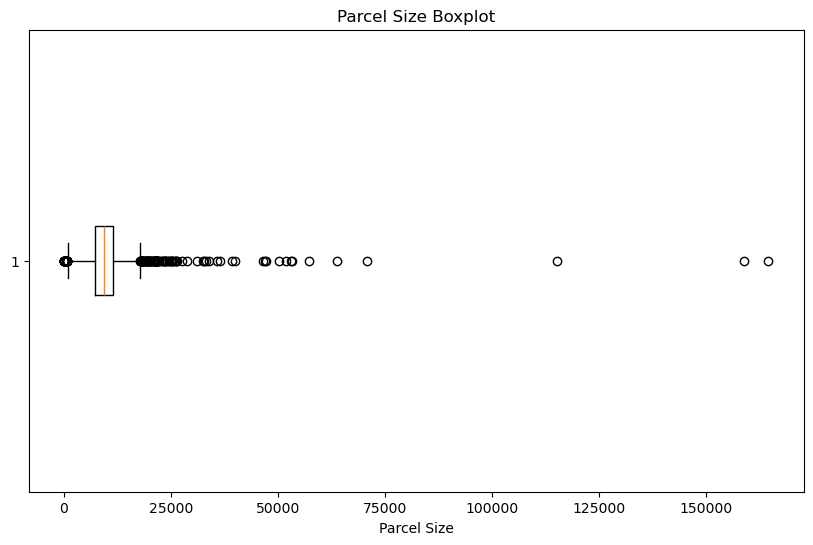

In [85]:
# Convert all ParcelSize values to absolute values to correct entry mistakes
df["ParcelSize"] = df["ParcelSize"].abs()

# Verify the fix
if (df["ParcelSize"] < 0).any():
    print("Warning: Some negative ParcelSize values still exist!")
else:
    print("✅ Negative ParcelSize values successfully fixed.")

print(df["ParcelSize"].describe())
#shows no negative values

#now show a boxplot of the parcel size to show there are no negetive values
plt.figure(figsize=(10, 6))
plt.boxplot(df['ParcelSize'], vert=False)
plt.title('Parcel Size Boxplot')
plt.xlabel('Parcel Size')
plt.show()


Step 4: Find Duplicate Entries

In [86]:
# Check for exact duplicates (entire row is duplicated)
duplicate_rows = df[df.duplicated()]
duplicate_rows = df2[df2.duplicated()]

# Display duplicates for review
if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} exact duplicate rows.")
    print(duplicate_rows)
else:
    print("✅ No exact duplicate rows found.")



Found 23 exact duplicate rows.
        DI  StructuralIntegrity ExteriorCharm
64      63                    5      Gleaming
152    150                    5      Gleaming
155    152                    5      Gleaming
217    213                    9        Common
264    259                    5        Common
327    321                    5        Common
333    326                    6        Common
476    468                    6        Common
484    475                    5        Common
522    512                    6        Common
660    649                    7        Common
744    732                    7      Gleaming
1327  1314                    4        Common
1445  1431                    5        Common
1814  1799                    5      Gleaming
1821  1805                    5        Common
1838  1821                    7      Gleaming
1952  1934                    5        Common
2044  2025                    5        Common
2087  2067                    5    Enchanting
215

We checked for duplicate values and found 25 duplicates. We decided between 3 options:

Option 1: Remove exact duplicates (i.e., rows that are completely identical).
    Drop all duplicate rows, keeping only the first occurrence (df.drop_duplicates()).
Option 2: Handle partial duplicates (e.g., same DI but different values in other columns):
    We could choose to keep the row with the highest TradeValue or merge values.
Option 3: Flag duplicates instead of removing them:
    Mark duplicates for further review (df["IsDuplicate"] = df.duplicated()).

We looked at the data and decided to choose option 1, since the duplicates were exact copies and removal would clean up the dataset.


In [87]:
# Drop exact duplicate rows
df = df.drop_duplicates()
df2 = df2.drop_duplicates()

# Confirm duplicates are removed
print(f"Dataset after removing exact duplicates: {df.shape}")
print(f"Dataset after removing exact duplicates: {df2.shape}")


Dataset after removing exact duplicates: (2340, 7)
Dataset after removing exact duplicates: (2340, 3)


In [88]:
# Check for duplicates based only on the unique identifier (DI)
partial_duplicates = df[df.duplicated(subset=["DI"], keep=False)]
partial_duplicates = df2[df2.duplicated(subset=["DI"], keep=False)]

if not partial_duplicates.empty:
    print(f"Found {len(partial_duplicates)} partial duplicates based on DI.")
    print(partial_duplicates)
else:
    print("✅ No partial duplicates found based on DI.")


✅ No partial duplicates found based on DI.


In [89]:
# Ensure no duplicates remain
if df.duplicated().sum() == 0:
    print("✅ All duplicate entries successfully handled.")
else:
    print("⚠️ Some duplicates may still exist!")

if df2.duplicated().sum() == 0:
    print("✅ All duplicate entries successfully handled.")
else:
    print("⚠️ Some duplicates may still exist!")

✅ All duplicate entries successfully handled.
✅ All duplicate entries successfully handled.


In [90]:
#show that there no duplicates remain
print("Duplicates in dataset:\n", df[df.duplicated()])


Duplicates in dataset:
 Empty DataFrame
Columns: [DI, TradeValue, RealmType, Enclave, LivingQuarters, ParcelSize, ParcelSizeUnit]
Index: []


Step 5: Handle Missing LivingQuarters Values

In [91]:
# Step 5: Handle Missing LivingQuarters Values

# Check for missing values in the 'LivingQuarters' column
missing_living_quarters = df["LivingQuarters"].isnull().sum()

# Option 1: Impute missing values with the most frequent value (mode)
# Get the most frequent value
most_frequent_value = df["LivingQuarters"].mode()[0]

# Fill missing values with the most frequent value, using .loc to avoid SettingWithCopyWarning
df.loc[df["LivingQuarters"].isnull(), "LivingQuarters"] = most_frequent_value

# Verify that there are no missing values left
if df["LivingQuarters"].isnull().sum() == 0:
    print(f"✅ All missing LivingQuarters values were filled with '{most_frequent_value}'.")
else:
    print(f"⚠️ There are still {df['LivingQuarters'].isnull().sum()} missing LivingQuarters values.")


✅ All missing LivingQuarters values were filled with '664.0'.


Step 6: Convert ParcelSizeUnit to Consistent Format

We checked for different ParcelSizeUnit values and found that there are two types: 'sqft' and 'sqm'.
We decided between 3 options:

Option 1: If 'sqft' is the most common unit, we can standardize all units to 'sqft'.
    Convert 'sqm' to 'sqft' using a conversion factor (1 sqm = 10.7639 sqft).
Option 2: If we need to keep both units for future analysis:
    We can keep 'sqft' and 'sqm' as is but add a new column to standardize them in 'sqft' for consistency.
Option 3: If we need to handle invalid or missing units:
    Convert them to NaN (missing values).

We looked at the data and decided to choose option 1, since 'sqft' is the most common unit used and converting 'sqm' to 'sqft' would standardize the dataset.



In [92]:
# Applying option 1: Convert 'sqm' to 'sqft'
conversion_factor = 10.7639
df.loc[df["ParcelSizeUnit"] == "sqm", "ParcelSize"] = df["ParcelSize"] * conversion_factor

# Standardize all 'ParcelSizeUnit' values to 'sqft'
df.loc[df["ParcelSizeUnit"] == "sqm", "ParcelSizeUnit"] = "sqft"

# Verify that all units are now 'sqft'
if df["ParcelSizeUnit"].nunique() == 1 and df["ParcelSizeUnit"].iloc[0] == "sqft":
    print("✅ All ParcelSizeUnits successfully standardized to 'sqft'.")
else:
    print("⚠️ There are still mixed ParcelSizeUnits.")


✅ All ParcelSizeUnits successfully standardized to 'sqft'.


Step 7: Fix Index After Changes

In [93]:
# Reset the index and drop the old index
df.reset_index(drop=True, inplace=True)

# Verify that the index has been reset
if df.index.is_monotonic_increasing:
    print("✅ The index has been successfully reset and is now sequential.")
else:
    print("⚠️ There may still be issues with the index.")

✅ The index has been successfully reset and is now sequential.


Benchmark model

In [94]:
# Import for train_test_split
from sklearn.model_selection import train_test_split

# pop() can be used to extract a column from the dataframe and remove it from the dataframe at the same time

# target is called y a lot in documentation
target = df.pop('TradeValue')

# features is called X a lot in documentation
features = df.drop(columns=['ParcelSizeUnit', 'ParcelSize', 'RealmType', 'Enclave'])

# random_state to get reproduceable results
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [95]:
# Simple centrality-based benchmark model using mean
value = y_train.median()

# Create a baseline prediction for the test set
pred_train = [value] * len(y_train)

pred_test = [value] * len(y_test)

Evaluation

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MAE of train set:', mean_absolute_error(pred_train, y_train), 'MSE of train set:', mean_squared_error(pred_train, y_train))
print('MAE of test set:', mean_absolute_error(pred_test, y_test), 'MSE of test set:', mean_squared_error(pred_test, y_test))

MAE of train set: 55995.95356125356 MSE of train set: 7028368581.840029
MAE of test set: 60563.92136752137 MSE of test set: 8032468132.4547


<h1> Iteration 2, Adding the Dataset

Step 8: Left Join to Add StructuralIntegrity & ExteriorCharm

In [97]:
# Perform a left join on the 'DI' column
df_merged = df.merge(df2, on='DI', how='left')

# Verify that the join was successful by checking the first few rows
print(df_merged.head())

# Optional: Verify that the new columns have been added correctly
if 'StructuralIntegrity' in df_merged.columns and 'ExteriorCharm' in df_merged.columns:
    print("✅ The columns 'StructuralIntegrity' and 'ExteriorCharm' were successfully added.")
else:
    print("⚠️ There was an issue with adding the new columns.")

   DI     RealmType      Enclave  LivingQuarters  ParcelSize ParcelSizeUnit  \
0   0   Meadowlands  Brightforge          2143.0      7939.0           sqft   
1   1   Meadowlands  Brightforge           923.0     10083.0           sqft   
2   2  GnomeBurough  Petalbridge           959.0      9439.0           sqft   
3   3   Meadowlands   Shadowmere           798.0      3869.0           sqft   
4   4   Meadowlands  Dragonspire          1172.0     11344.0           sqft   

   StructuralIntegrity ExteriorCharm  
0                    5        Common  
1                    5      Gleaming  
2                    5        Common  
3                    6      Gleaming  
4                    5        Common  
✅ The columns 'StructuralIntegrity' and 'ExteriorCharm' were successfully added.


step 9: check to see if any error and or mistakes were present in the merged dataset 

In [98]:
#check for missing values in the merged dataframe
missing_values = df_merged.isnull().sum()
print("Missing values in the merged dataframe:")
print(missing_values[missing_values > 0])  # Only show columns with missing values
# Check for duplicates in the merged dataframe
duplicates_merged = df_merged[df_merged.duplicated(subset=["DI"], keep=False)]
print(f"Found {len(duplicates_merged)} duplicates in the merged dataframe based on DI.")
duplicates_merged = df_merged[df_merged.duplicated(subset=["DI"], keep=False)]
print(duplicates_merged)
#Check for negetive values in the merged dataframe
negative_values = df_merged[df_merged["ParcelSize"] < 0]
print("Negative values in the merged dataframe:")
print(negative_values)  # Show rows with negative ParcelSize values

Missing values in the merged dataframe:
Series([], dtype: int64)
Found 0 duplicates in the merged dataframe based on DI.
Empty DataFrame
Columns: [DI, RealmType, Enclave, LivingQuarters, ParcelSize, ParcelSizeUnit, StructuralIntegrity, ExteriorCharm]
Index: []
Negative values in the merged dataframe:
Empty DataFrame
Columns: [DI, RealmType, Enclave, LivingQuarters, ParcelSize, ParcelSizeUnit, StructuralIntegrity, ExteriorCharm]
Index: []


Step 10: Save the Cleaned Dataset

In [99]:
# 1. Check for missing values in critical columns
missing_values = df_merged.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 2. Check for duplicate rows
duplicates = df_merged.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows.")
else:
    print("✅ No duplicate rows found.")

# 3. Check data types of columns
data_types = df_merged.dtypes
print("\nData types of each column:\n", data_types)

# 4. Verify column names
expected_columns = ['DI', 'TradeValue', 'RealmType', 'Enclave', 'LivingQuarters', 'ParcelSize', 'ParcelSizeUnit', 'StructuralIntegrity', 'ExteriorCharm']
unexpected_columns = set(df_merged.columns) - set(expected_columns)
if len(unexpected_columns) > 0:
    print(f"⚠️ Unexpected columns found: {unexpected_columns}")
else:
    print("✅ Column names are as expected.")

# 5. Verify the final dataset size
print(f"\nFinal dataset size: {df_merged.shape[0]} rows and {df_merged.shape[1]} columns.")

# 6. Check for outliers or unexpected values in critical columns
# Example: Check for negative values in 'ParcelSize' and 'LivingQuarters'
negative_parcel_size = df_merged[df_merged['ParcelSize'] < 0].shape[0]
if negative_parcel_size > 0:
    print(f"⚠️ Found {negative_parcel_size} rows with negative ParcelSize values.")
else:
    print("✅ No negative ParcelSize values found.")

# Example: Check for outliers in 'TradeValue' (if necessary, this can be extended for other columns)
trade_value_outliers = df_merged[df_merged['TradeValue'] > df_merged['TradeValue'].quantile(0.99)].shape[0]
if trade_value_outliers > 0:
    print(f"⚠️ Found {trade_value_outliers} outlier(s) in 'TradeValue'.")
else:
    print("✅ No outliers found in 'TradeValue'.")

# Additional checks for consistency and logical errors can be added as needed.

# Print the summary of changes (optional)
print("\nStep 9 completed. Data is now ready for further analysis or modeling.")


Missing values in each column:
 DI                     0
RealmType              0
Enclave                0
LivingQuarters         0
ParcelSize             0
ParcelSizeUnit         0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64
✅ No duplicate rows found.

Data types of each column:
 DI                       int64
RealmType               object
Enclave                 object
LivingQuarters         float64
ParcelSize             float64
ParcelSizeUnit          object
StructuralIntegrity      int64
ExteriorCharm           object
dtype: object
✅ Column names are as expected.

Final dataset size: 2340 rows and 8 columns.
✅ No negative ParcelSize values found.


KeyError: 'TradeValue'

Save the cleaned data

In [ ]:
# Step: Define the folder path and file path
folder_path = "cleaned"
file_path = os.path.join(folder_path, "cleaned_data.csv")

# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the DataFrame to a CSV file
df_merged.to_csv(file_path, index=False)

# Confirm that the dataset has been saved successfully
print(f"✅ The cleaned dataset has been saved to '{file_path}'.")

df_merged.describe(include='O')


✅ The cleaned dataset has been saved to 'cleaned\cleaned_data.csv'.


,RealmType,Enclave,ParcelSizeUnit,ExteriorCharm
count,2340,2340,2340,2340
unique,3,27,1,4
top,Meadowlands,Dragonspire,sqft,Common
freq,1776,353,2340,1431
